In [1]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [2]:
x_train.shape

(60000, 28, 28)

In [3]:
x_test.shape

(10000, 28, 28)

In [4]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [5]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [6]:
x_train /= 255
x_test /= 255

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

C:\Users\Prabhu\anaconda3\envs\VEAI\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
#https://keras.io/api/optimizers/
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history=model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.9942 - loss: 0.0167
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9958 - loss: 0.0133
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9954 - loss: 0.0136
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9959 - loss: 0.0129
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9957 - loss: 0.0125
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9960 - loss: 0.0108
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9957 - loss: 0.0123
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9966 - loss: 0.0114
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9969 - loss: 0.0086
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9962 - loss: 0.0119


In [11]:
print(history.history)

{'accuracy': [0.9935666918754578, 0.9951333403587341, 0.9947500228881836, 0.9952499866485596, 0.9955333471298218, 0.9961166381835938, 0.9952499866485596, 0.9962666630744934, 0.9962833523750305, 0.9959999918937683], 'loss': [0.01890544779598713, 0.014631620608270168, 0.015282336622476578, 0.013890066184103489, 0.013327063992619514, 0.012030749581754208, 0.013744746334850788, 0.011890353634953499, 0.011023872531950474, 0.012418391183018684]}


In [12]:
print("Training Accuracy:\n", history.history['accuracy'])
print("Training Loss: \n", history.history['loss'])

Training Accuracy:
 [0.9935666918754578, 0.9951333403587341, 0.9947500228881836, 0.9952499866485596, 0.9955333471298218, 0.9961166381835938, 0.9952499866485596, 0.9962666630744934, 0.9962833523750305, 0.9959999918937683]
Training Loss: 
 [0.01890544779598713, 0.014631620608270168, 0.015282336622476578, 0.013890066184103489, 0.013327063992619514, 0.012030749581754208, 0.013744746334850788, 0.011890353634953499, 0.011023872531950474, 0.012418391183018684]


In [15]:
test_loss,test_accuracy=model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9814 - loss: 0.1020


In [16]:
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss    : {test_loss:.4f}")

Test Accuracy: 0.9839
Test Loss: 0.0907


In [29]:
#Predicting the labels-DIGIT
y_predict = model.predict(x_test)
y_predict

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


array([[7.1884061e-15, 6.5425214e-15, 1.7395710e-15, ..., 1.0000000e+00,
        1.5916599e-18, 1.0762685e-11],
       [1.1408161e-16, 2.9164799e-15, 1.0000000e+00, ..., 1.5939337e-24,
        5.1034221e-19, 9.8424552e-30],
       [3.1068786e-13, 1.0000000e+00, 2.9584443e-11, ..., 1.0782444e-12,
        1.4908275e-09, 1.5455053e-14],
       ...,
       [2.5327874e-32, 1.1888459e-19, 1.3096331e-26, ..., 2.6786846e-13,
        2.0724357e-17, 2.1294006e-11],
       [2.7101822e-25, 3.8730931e-23, 2.3449209e-33, ..., 1.5760123e-25,
        1.3315652e-13, 4.9019346e-23],
       [2.0556939e-19, 1.0049989e-29, 3.7837023e-24, ..., 1.2768276e-35,
        9.0813275e-27, 2.6707818e-25]], dtype=float32)

In [36]:
import numpy as np
#y_predicts=np.array(y_predict) # Here we get the index of maximum value in the encoded vector
y_predicts = np.argmax(y_predicts, axis=1)

y_test_digit_eval=np.array(y_test)

In [43]:
import pandas as pd
y_pre=pd.DataFrame(y_predicts)

In [44]:
y_pre

,0
0,7
1,2
2,1
3,0
4,4
...,...
9995,2
9996,3
9997,4
9998,5


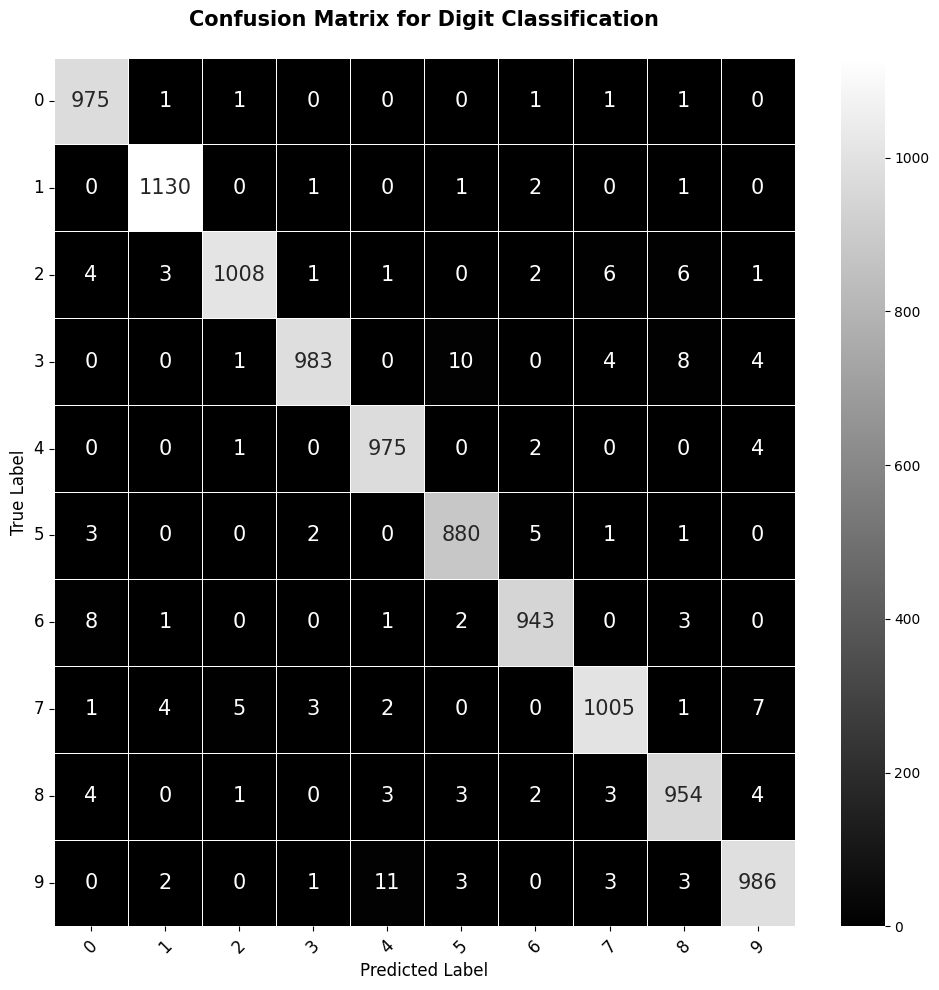

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion matrix
con_mat = confusion_matrix(y_test_digit_eval, y_predicts)

# Set style (optional)
plt.style.use('default')

# Create the heatmap with improved visual aesthetics
plt.figure(figsize=(10,10))
sns.heatmap(con_mat, annot=True, annot_kws={'size': 15}, linewidths=0.5, fmt="d", cmap="gray", cbar=True)

# Improve readability of labels
plt.xticks(fontsize=12, rotation=45)  # Rotate x-axis labels
plt.yticks(fontsize=12, rotation=0)   # Rotate y-axis labels

# Add title and axis labels
plt.title('Confusion Matrix for Digit Classification\n', fontweight='bold', fontsize=15)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)

# Ensure that labels fit well
plt.tight_layout()

# Show the plot
plt.show()

In [35]:
print(type(y_test_digit_eval))  # Should be numpy.ndarray or list
print(type(y_predicts))         # Should be numpy.ndarray or list


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [38]:
from sklearn.metrics import classification_report

print(classification_report(y_test_digit_eval,y_predicts))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.99      0.97      0.98      1010
           4       0.98      0.99      0.99       982
           5       0.98      0.99      0.98       892
           6       0.99      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



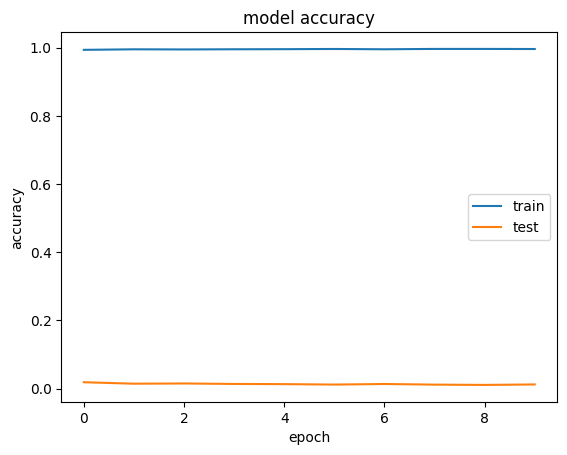

In [41]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [48]:
print(y_predict[6900])

[2.9360505e-21 7.2431212e-24 1.6398573e-24 3.2546446e-25 3.5805788e-22
 9.9206610e-17 1.0000000e+00 1.6662914e-24 4.9771309e-17 6.9792250e-34]


In [54]:
print(np.argmax(y_predict[6900]))

6


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
6


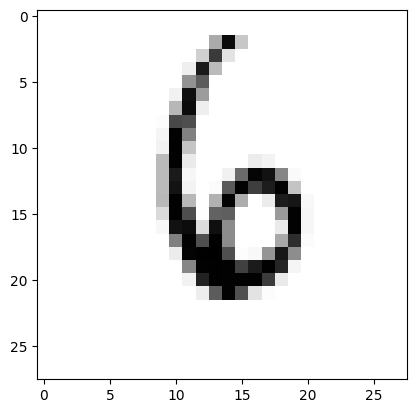

In [39]:
import matplotlib.pyplot as plt
image_index = 6900
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
predict = x_test[image_index].reshape(28,28)
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

In [45]:
model.save("CNNDigit_model.h5")
